In [58]:
import numpy as np
import matplotlib.pyplot as plt

In [59]:
M = 100
CUTOFF = 0.05

seconds = 2
samples = np.linspace(0, seconds, M * seconds, endpoint=False)

signal_or = np.sin(5 * np.pi * samples) + np.cos(2 * np.pi * samples) 
signal = np.sin(5 * np.pi * samples) + np.cos(2 * np.pi * samples) + np.sin(95 * np.pi * samples) + np.random.normal(0, 0.1, M * seconds)
signal1 = np.sin(5 * np.pi * samples) + np.cos(2 * np.pi * samples) + np.random.normal(0, 0.1, M * seconds)

x = np.exp(-2 * np.pi * CUTOFF)

B1 = x
A0 = 1 - B1

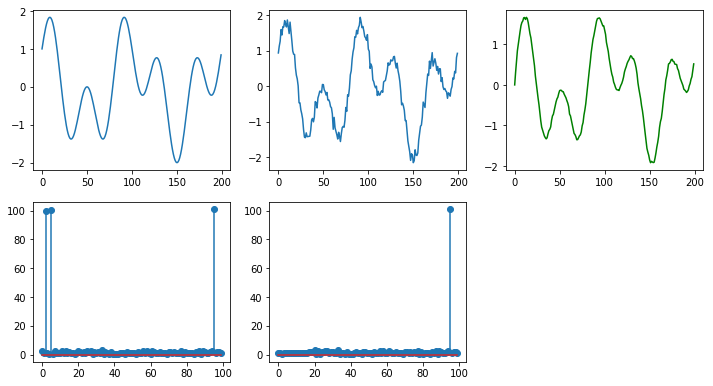

In [73]:
fc = 0.1  # Cutoff frequency as a fraction of the sampling rate (in (0, 0.5)).
b = 0.08  # Transition band, as a fraction of the sampling rate (in (0, 0.5)).
N = 100
n = np.arange(N)
 
# Compute a low-pass filter
h = np.sinc(2 * fc * (n - (N - 1) / 2))
w = np.hamming(N)
h = h * w
h = h / np.sum(h)
 
# Create a high-pass filter from the low-pass filter through spectral inversion
h = -h
h[(N - 1) // 2] += 1


plt.figure(figsize=(12,10))


plt.subplot(3,3,1)
plt.plot(signal_or)

plt.subplot(3,3,2)
plt.plot(signal1)


plt.subplot(3,3,3)
plt.plot(IIR_LPF(signal1), color='g')

plt.subplot(3,3,4)
plt.stem(abs(np.fft.fft(signal))[:len(signal)//2:])

plt.subplot(3,3,5)
plt.stem(abs(np.fft.fft(np.convolve(h, signal, mode='same'))[:len(signal)//2:]))

plt.show()

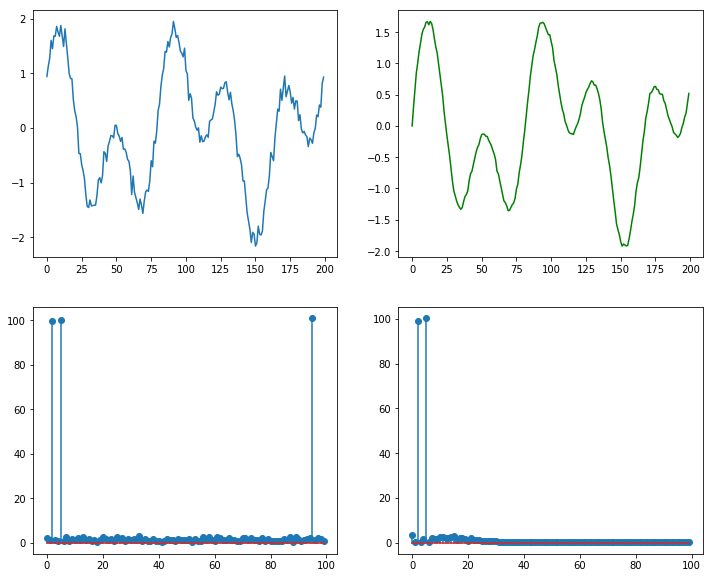

In [70]:
fL = 0.1  # Cutoff frequency as a fraction of the sampling rate (in (0, 0.5)).
fH = 50  # Cutoff frequency as a fraction of the sampling rate (in (0, 0.5)).
b = 0.08  # Transition band, as a fraction of the sampling rate (in (0, 0.5)).
N = 100
n = np.arange(N)
 
# Compute a low-pass filter
hlpf = np.sinc(2 * fL * (n - (N - 1) / 2))
hlpf *= np.hamming(N)
hlpf /= np.sum(hlpf)
 
# Compute a high-pass filter
hhpf = np.sinc(2 * fH * (n - (N - 1) / 2))
hhpf *= np.hamming(N)
hhpf /= np.sum(hhpf)
hhpf = -hhpf
hhpf[(N - 1) // 2] += 1
 
# Add both filters.
h = hlpf + hhpf

plt.figure(figsize=(12,10))

plt.subplot(2,2,1)
plt.plot(signal1)

plt.subplot(2,2,2)
plt.plot(IIR_LPF(signal1), color='g')

plt.subplot(2,2,3)
plt.stem(abs(np.fft.fft(signal))[:len(signal)//2:])

plt.subplot(2,2,4)
plt.stem(abs(np.fft.fft(np.convolve(h, signal, mode='same'))[:len(signal)//2:]))

plt.show()

In [ ]:
def FIR_response(length):

    window = window = np.hamming(length)

    i = (np.arange(length) - length // 2).astype(np.float64)
    i[i == 0] = 2 * np.pi * CUTOFF
    h = (np.sin(2 * np.pi * CUTOFF * i) / i) * window
    h /= sum(h)

    return h


def IIR_response(length):

    pulse = np.zeros(length, dtype=np.float64)
    pulse[1] = 1

    return IIR_LPF(pulse)


def IIR_LPF(signal):

    result = np.zeros_like(signal, dtype=np.float64)
    for i in range(1, len(signal)):
        result[i] = A0 * signal[i] + B1 * result[i - 1]

    return result

h = IIR_response(M)

plt.figure(figsize=(12,10))

plt.subplot(2,2,1)
plt.plot(signal1)


plt.subplot(2,2,2)
plt.plot(IIR_LPF(signal1), color='g')

plt.subplot(2,2,3)
plt.stem(abs(np.fft.fft(signal))[:len(signal)//2:])
#plt.figure(2).canvas.set_window_title("Single-pole filter")

plt.subplot(2,2,4)
plt.stem(abs(np.fft.fft(np.convolve(h, signal, mode='same'))[:len(signal)//2:]))

plt.show()